In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px

In [5]:
wine_data = pd.read_csv('wine.csv')
wine_data[:10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


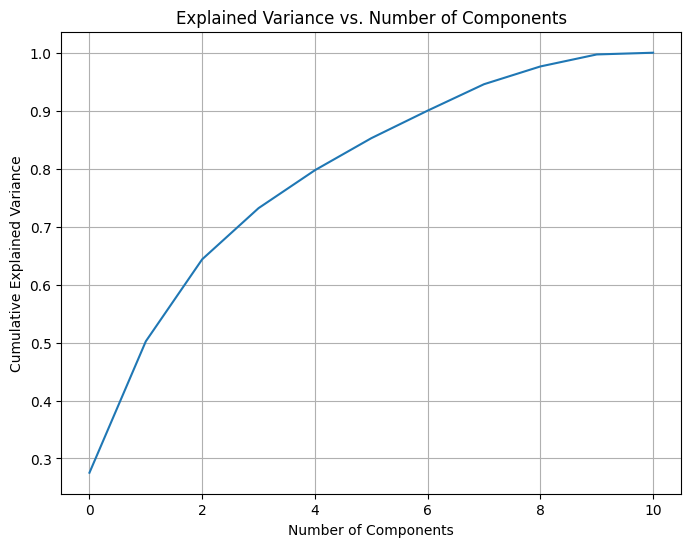

In [126]:
wine_data = pd.read_csv('wine.csv')
X = wine_data.drop(['color','quality'], axis=1)
y_color = wine_data['color']
y_quality = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


We will be choosing the number of components as 2

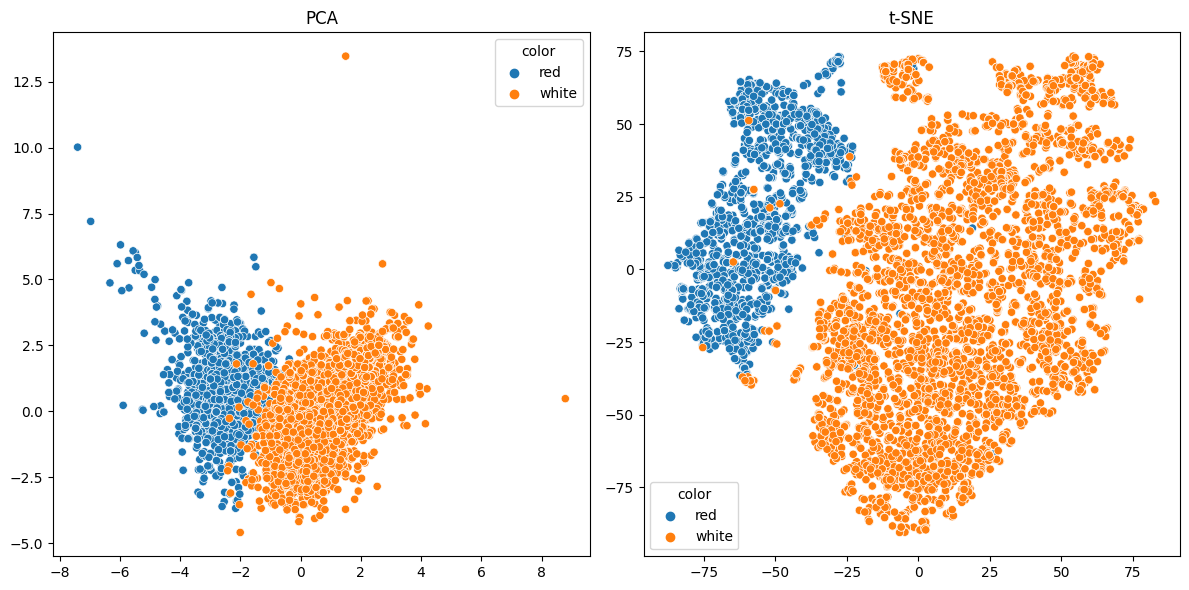

In [150]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_color)
plt.title('PCA')

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_color)
plt.title('t-SNE')
plt.tight_layout()
plt.show()

The clusters you see in the PCA graph separate out the red and white wine colors better than t-SNE for the same

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

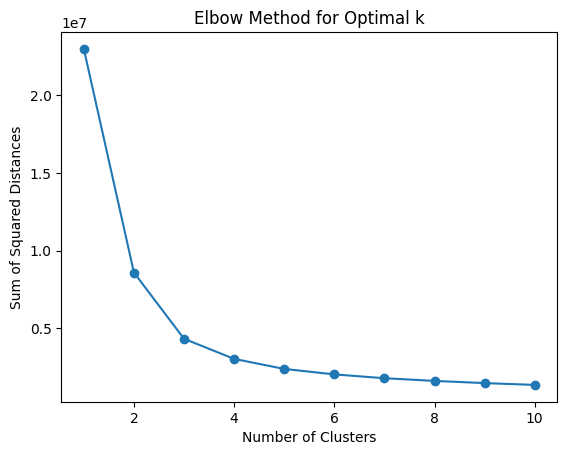

In [129]:
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

From the above graph we can see that the elbow is at n=3 so we will perform k-means on 3 clusters

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



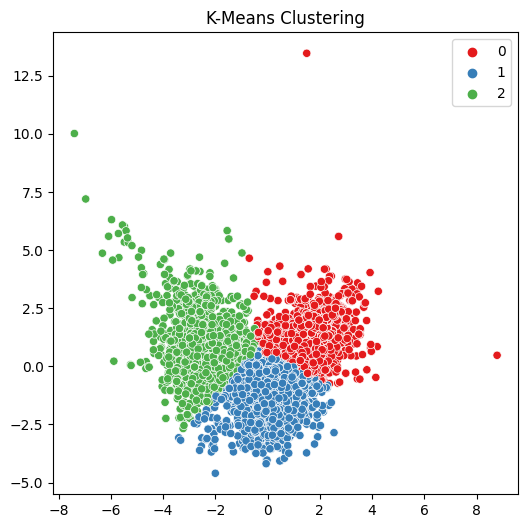

In [162]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [148]:

df_pca_color = pd.concat([X.reset_index(drop=True), pd.DataFrame(X)], axis=1)
df_pca_color['color']=y_color 
df_pca_color['quality']=y_quality

df_pca_color['K-means PCA'] = kmeans_labels
df_pca_analysis_color = df_pca_color.drop(['color'],axis=1).groupby(['K-means PCA']).mean().round(2)
color_cluster=df_pca_color.groupby(['K-means PCA'])['color'].value_counts().reset_index()
color_cluster=color_cluster.pivot(index='K-means PCA',columns='color',values='count').reset_index()



In [149]:

df_pca_analysis_color.merge(color_cluster,left_on='K-means PCA',right_on='K-means PCA')

,K-means PCA,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,...,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,red,white
0,0,6.98,0.28,0.36,11.15,0.05,45.55,169.82,1.00,3.16,...,0.05,45.55,169.82,1.00,3.16,0.49,9.54,5.62,4,1892
1,1,8.36,0.53,0.27,2.57,0.09,15.69,47.63,1.00,3.30,...,0.09,15.69,47.63,1.00,3.30,0.66,10.34,5.59,1538,54
2,2,6.76,0.27,0.32,3.37,0.04,28.91,117.71,0.99,3.21,...,0.04,28.91,117.71,0.99,3.21,0.49,11.17,6.06,57,2952


Here we can see that the wine in cluster 0 are more likely be of color White
Here we can see that the wine in cluster 1 are more likely be of color Red
Here we can see that the wine in cluster 2 are more likely be of color White

We can also see that apart from a few points the cluster mostly have just one color i.e the k-means with PCA is a good way of distinguishing the red wines from white wines

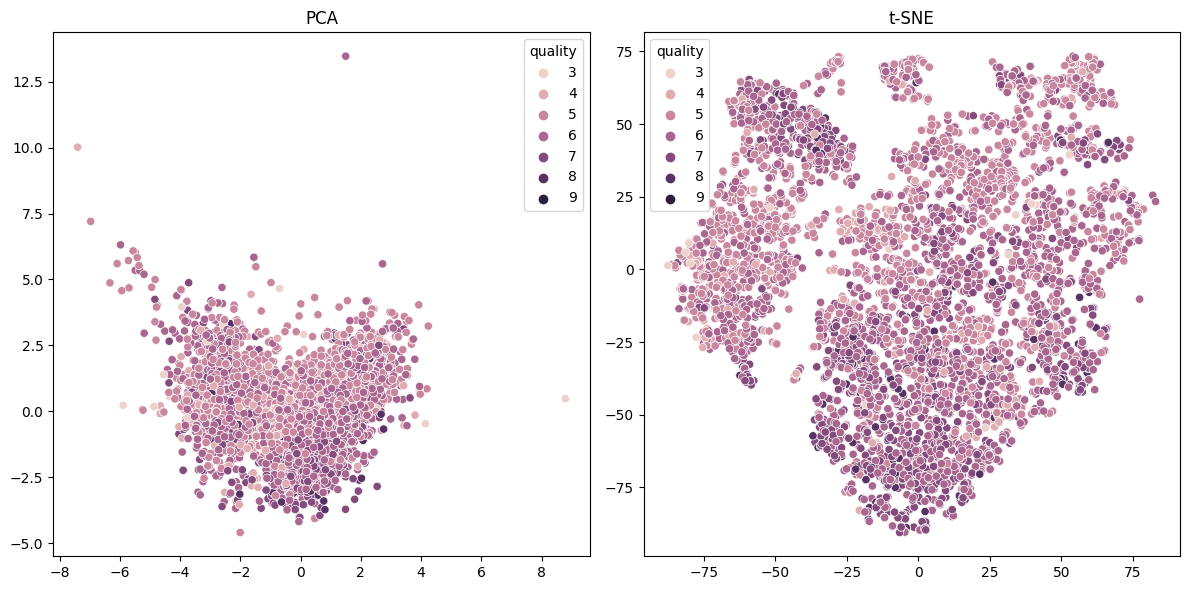

In [154]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_quality)
plt.title('PCA')

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_quality)
plt.title('t-SNE')
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



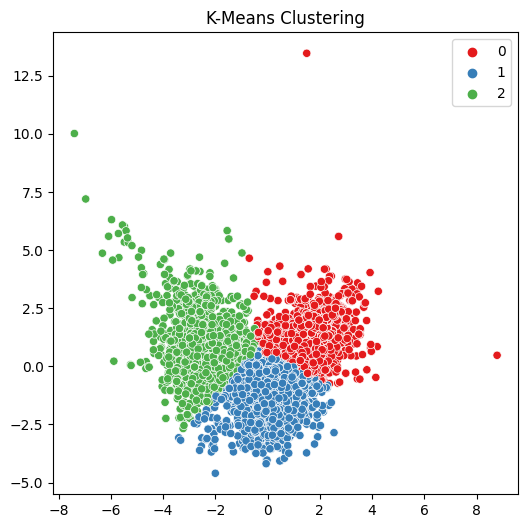

In [161]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [158]:
df_pca_quality = pd.concat([X.reset_index(drop=True), pd.DataFrame(X)], axis=1)
df_pca_quality['quality']=y_quality

df_pca_quality['K-means PCA'] = kmeans_labels
df_pca_analysis_quality = df_pca_quality.drop(['quality'],axis=1).groupby(['K-means PCA']).mean().round(2)
quality_cluster=df_pca_quality.groupby(['K-means PCA'])['quality'].value_counts().reset_index()
quality_cluster=quality_cluster.pivot(index='K-means PCA',columns='quality',values='count').reset_index()

In [159]:
df_pca_analysis_quality.merge(quality_cluster,left_on='K-means PCA',right_on='K-means PCA')

,K-means PCA,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,...,pH,sulphates,alcohol,3,4,5,6,7,8,9
0,0,6.98,0.28,0.36,11.15,0.05,45.55,169.82,1.00,3.16,...,3.16,0.49,9.54,12.0,48.0,804.0,844.0,157.0,30.0,1.0
1,1,8.36,0.53,0.27,2.57,0.09,15.69,47.63,1.00,3.30,...,3.30,0.66,10.34,10.0,68.0,696.0,621.0,182.0,15.0,NaN
2,2,6.76,0.27,0.32,3.37,0.04,28.91,117.71,0.99,3.21,...,3.21,0.49,11.17,8.0,100.0,638.0,1371.0,740.0,148.0,4.0


* Here We can see that the quality of the wine in cluster 0 are more likely to have a quality of 5,6
* The quality of the wine in cluster 1 are more likely to have a quality of 5,6 again
* The quality of the wine in the cluster 2 are more likely to have a quality 5,6,7

However we notice that there are no clear clusters forming like they were while we were plotting it for color. Most of the wine quality values are overlapping and aren't associated with any particular cluster for PCA 

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



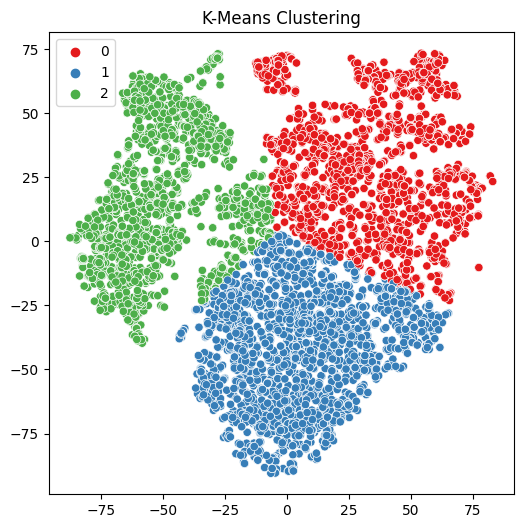

In [163]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [164]:
df_tsne_quality = pd.concat([X.reset_index(drop=True), pd.DataFrame(X)], axis=1)
df_tsne_quality['quality']=y_quality

df_tsne_quality['K-means PCA'] = kmeans_labels
df_tsne_analysis_quality = df_tsne_quality.drop(['quality'],axis=1).groupby(['K-means PCA']).mean().round(2)
quality_cluster=df_tsne_quality.groupby(['K-means PCA'])['quality'].value_counts().reset_index()
quality_cluster=quality_cluster.pivot(index='K-means PCA',columns='quality',values='count').reset_index()

In [165]:
df_tsne_analysis_quality.merge(quality_cluster,left_on='K-means PCA',right_on='K-means PCA')

,K-means PCA,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,...,pH,sulphates,alcohol,3,4,5,6,7,8,9
0,0,6.87,0.28,0.35,10.49,0.05,43.56,163.55,1.00,3.17,...,3.17,0.49,9.64,11.0,44.0,878.0,998.0,206.0,33.0,1.0
1,1,6.87,0.27,0.34,3.19,0.04,29.52,116.87,0.99,3.19,...,3.19,0.48,11.39,7.0,67.0,428.0,1105.0,647.0,140.0,4.0
2,2,8.03,0.50,0.26,2.57,0.08,17.10,60.51,1.00,3.30,...,3.30,0.64,10.33,12.0,105.0,832.0,733.0,226.0,20.0,NaN


Even after performing K-means with TSNE we don't see clear distinction that a certain set of qualities belong to a given cluster.

We can conclude that:
* For distinguishing wine color PCA and t-SNE both perform well but PCA provides a slightly better distinction than t-SNE
* K-means with dimensions from PCA creates clear clusters and each of the cluster can be fairly distinguished either as a white wine cluster or a red whine cluster
* For distinguishing the quality of the wine both PCA and t-SNE perform poorly. You can see no clusters forming distinctly
* When we perform k-means with PCA for quality we notice that we can't assign a quality or even a range of qualities to any clusters because each cluster has datapoints with all or most of the qualities of the wine
* We notice the same for t-SNE. 
* Quality is not a good candidate for clustering techniquaes but color is

Based on the analysis of the wine dataset using PCA, t-SNE, and K-means clustering, we can draw the following conclusions:

#### Distinguishing Wine Color:
Both PCA and t-SNE are effective in distinguishing between red and white wines based on the chemical properties. However, PCA provides a slightly clearer separation between the two colors compared to t-SNE. K-means clustering using the dimensions from PCA creates well-defined clusters, with each cluster representing either a white wine or a red wine. This indicates that unsupervised techniques are capable of differentiating wine colors based on the chemical properties.

#### Distinguishing Wine Quality:
Both PCA and t-SNE perform poorly in distinguishing the quality of the wine. There are no distinct clusters forming based on the quality variable, and the points are scattered across the plot. When applying K-means clustering on PCA or t-SNE results for wine quality, we observe that the clusters formed do not correspond to specific quality levels or ranges. This suggests that the unsupervised techniques are not effective in clustering the wines based on their quality.

Overall, while both PCA and t-SNE are useful for identifying certain patterns in the dataset, they have limitations when it comes to distinguishing the quality of the wines. The chemical properties seem to have more influence on color than on quality. For color-based clustering, K-means clustering using PCA dimensions provides clear and meaningful clusters. However, for quality-based clustering, these techniques do not yield interpretable results.

These findings highlight the importance of understanding the underlying characteristics of the data and the goals of the analysis when choosing the appropriate dimensionality reduction technique and clustering algorithm. It's also a reminder that some variables might not be well-suited for unsupervised techniques and may require other methods or more contextual information for accurate analysis.